# 분류Classification

## 1. 로지스틱 회귀 Logistic regression

분류Classification는 지도학습Supervised learning 중 회귀와 더불어 가장 많이 사용되는 머신러닝 알고리즘입니다. 분류기법 중 특히 **로지스틱 회귀**는 선형회귀 방식을 분류에 적용하기 위해 몇 가지 아이디어를 더한 방식으로 이름에서 알 수 있듯 선형함수 대신 비선형인 시그모이드 함수를 사용해 최적의 분류 경계선을 찾고, 이 시그모이드 함수의 반환값을 확률로 간주해서, 확률에 따라 분류를 결정합니다.

로지스틱 회귀의 원리를 이해하기 위해서는 오즈비Odds Ratio부터 로짓함수Logit function, 시그모이드 함수Sigmoid function, 로지스틱 회귀를 위한 손실함수Loss function 및 (경사하강법을 적용하기 위한) 손실함수의 미분 등을 알아야 하지만, 엔진의 원리나 공기역학을 이해하지 않아도 자동차를 운전할 수 있듯이, 이 과정에서도 수식의 유도보다는 활용에 촛점을 두고 설명을 드리겠습니다.

그래도 최대한 양보해서 **시그모이드 함수가 어떤 모양**인지는 알아둬야겠습니다.

시그모이드 함수의 그래프는 아래와 같습니다.

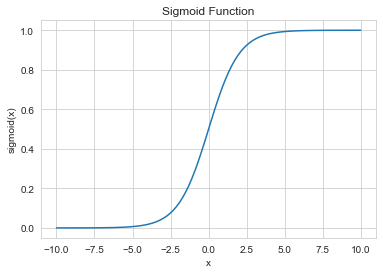

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import sigmoid

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function")
plt.plot(x, y)
plt.show()

시그모이드 함수는 이렇게 부드러운 S자 곡선을 그립니다. x가 0일 때 y는 정확히 0.5를 가리키며, 좌우로 각각 0과 1에 수렴합니다. 그런데 왜 분류를 하기 위해 선형함수가 아닌, 굳이 이렇게 복잡한 수식의 굽은 곡선을 이용해야 할까요? 아래 예시를 보면서 이해해봅시다.

사실 지난 시간에 알려드렸던 선형회귀를 이용해서도 분류 알고리즘을 만들 수는 있습니다. 아래처럼요.
> 코드는 이해하지 않으셔도 괜찮습니다.

w = 0.07, b = 0.52


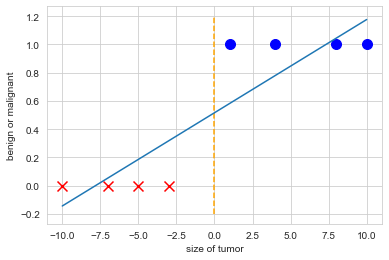

In [83]:
from sklearn.linear_model import LinearRegression

size_of_tumor = [-10, -7, -5, -3, 1, 4, 8, 10]  # 종양의 지름
malignant = [0, 0, 0, 0, 1, 1, 1, 1]  # 양성(benign)
# size_of_tumor1 = [1, 4, 8, 10]  # 종양의 지름
# malignant1 = [1, 1, 1, 1]  # 악성(malignant)

colors = ["red" if mal == 0 else "blue" for mal in malignant]
markers = ["x" if mal == 0 else "o" for mal in malignant]

for dot in range(len(size_of_tumor)):
    plt.scatter(size_of_tumor[dot], malignant[dot], c=colors[dot], marker=markers[dot], s=100)
# plt.scatter(size_of_tumor1, malignant1, c="blue", marker="o", s=100)

lr = LinearRegression()
X = np.array(size_of_tumor).reshape(-1, 1)
y = np.array(malignant).reshape(-1, 1)
lr.fit(X, y)
predict = lr.predict(X)
print(f"w = {lr.coef_[0][0]:0.2f}, b = {lr.intercept_[0]:0.2f}")

plt.plot(X, predict)
plt.vlines(0, -0.2, 1.2, colors="orange", linestyles="dashed")
plt.xlabel("size of tumor")
plt.ylabel("benign or malignant")
plt.show()

선형회귀를 통한 예측값(y)의 구분점threshold을 0.5 근처로 잡으면 (단순하기는 하지만) 어느 정도 합리적으로 분류를 해낼 수 있을 것 같기도 합니다. 노란 점선(threshold:0.5) 왼쪽으로 추가되는 데이터는 양성benign, 오른쪽으로는 악성malignant으로 구분하면 되지 않을까요?

그런데 말입니다..
이 선형회귀 분류모델에는 치명적인 약점이 하나 있습니다. 바로 이상치anomaly 데이터에 취약하다는 점인데요.
데이터를 조금만 추가해봅시다.

w = 0.00, b = 0.48


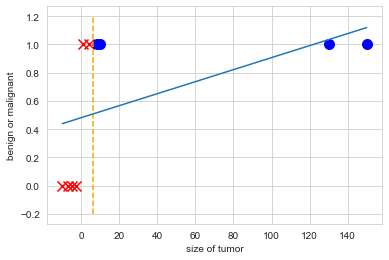

In [111]:
from sklearn.linear_model import LinearRegression

size_of_tumor = [-10, -7, -5, -3, 1, 4, 8, 10, 130, 150]  # 종양의 지름
malignant = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 양성(benign)

lr = LinearRegression()
X_new = np.array(size_of_tumor).reshape(-1, 1)
y_new = np.array(malignant).reshape(-1, 1)
lr.fit(X_new, y_new)
predict = lr.predict(X_new)
print(f"w = {lr.coef_[0][0]:0.2f}, b = {lr.intercept_[0]:0.2f}")

colors = ["red" if lr.coef_[0][0] * x + lr.intercept_ <= 0.5 else "blue" for x in X_new]
markers = ["x" if lr.coef_[0][0] * x + lr.intercept_ <= 0.5 else "o" for x in X_new]

for dot in range(len(size_of_tumor)):
    plt.scatter(size_of_tumor[dot], malignant[dot], c=colors[dot], marker=markers[dot], s=100)

plt.plot(X_new, predict)

plt.vlines(6, -0.2, 1.2, colors="orange", linestyles="dashed")
plt.xlabel("size of tumor")
plt.ylabel("benign or malignant")
plt.show()

이상치값을 딱 두 개 추가했더니 가운데 근처에서 잘못 분류되는 데이터가 나타나기 시작합니다.
어찌 보면 당연한 결과지요. 선형회귀 모델의 기울기와 절편이 바뀌었으니까요.

그러면 로지스틱회귀를 이용한 분류는 결과가 어떻게 나타날까요?
선형회귀와 다른 결과를 보여줄 수 있을까요?

먼저 이상치가 없는 기존데이터 플롯입니다.

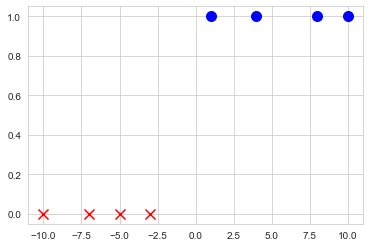

In [118]:
from sklearn.linear_model import LogisticRegression

lgr_model = LogisticRegression()
lgr_model.fit(X, y.reshape(-1, ))
y_pred = lgr_model.predict(X)

colors = ["red" if pr == 0 else "blue" for pr in y_pred]
markers = ["x" if pr == 0 else "o" for pr in y_pred]

for d in range(len(X)):
    plt.scatter(X[d], y_pred[d], c=colors[d], marker=markers[d], s=100)

우선은 선형회귀와 동일한 결과를 나타냅니다.
이번에는 이상치를 추가한 데이터셋의 로지스틱회귀 예측결과입니다.

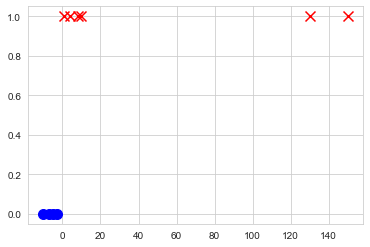

In [123]:
from sklearn.linear_model import LogisticRegression

lgr_model = LogisticRegression()
lgr_model.fit(X_new, y_new.reshape(-1, ))
y_pred = lgr_model.predict(X_new)

colors = ["red" if s > 0 else "blue" for s in y_pred]
markers = ["x" if s > 0 else "o" for s in y_pred]

for d in range(len(X_new)):
    plt.scatter(X_new[d], y_pred[d], c=colors[d], marker=markers[d], s=100)

신기하게도 데이터 사이즈가 나뉘는 지점에서 오류 없이 잘 구분해주는 것을 확인할 수 있습니다.
왜 로지스틱 회귀는 이상치가 있음에도 강건하게 분류를 해 줄 수 있는 걸까요?
애니메이션으로 한 번 확인해봅시다. (C1_W3_Lab01_Classification 및 Lab02_Sigmoid_function 자료 참조)

> 출처 : coursera_classification



이제 로지스틱 회귀 및 시그모이드함수의 특징과 선형회귀와의 차이에 대해서 어느 정도 이해하게 된 것 같습니다. 이번에는 사이킷런의 LogisticRegression 대신 좀 더 구체적으로 파라미터를 결정할 수 있는 SGDClassifier 클래스로 로지스틱회귀 모델을 만들어봅시다. 데이터셋은 위스콘신 유방암 데이터를 사용합시다. 먼저 데이터를 불러옵니다.

In [139]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [140]:
cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

각 칼럼이 정수로 표기되어 있어 의미를 파악하기 어렵습니다. 자세한 설명은 cancer.DESCR을 통해 확인할 수 있습니다. 특성만 파악하고 싶다면 cancer.feature_names를 통해서 확인할 수도 있습니다.

In [142]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [143]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


이제 모델을 생성하겠습니다. 과적합을 방지하기 위해 훈련데이터세트와 테스트 세트를 분리하겠습니다.
참고로 입력변수 x, 즉 특성은 cancer.data로, 타겟변수 y는 cancer.target에 저장되어 있습니다.

In [145]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size=0.2)

sgd = SGDClassifier(loss="log", max_iter=100, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', max_iter=100, random_state=42)

빠르게 학습이 완료되었습니다. 정확도를 확인해볼까요?

In [154]:
print(f"정확도 : {sgd.score(X_test, y_test)*100:0.2f} %")

정확도 : 91.23 %


이제 학습이 완료된 sgd 모델의 predict 메서드를 통해 새로운 예측값을 확인할 수 있게 되었습니다.

In [177]:
x_sample = np.array([17.01, 20.26, 109.7, 904.3, 0.08772, 0.07304, 0.0695, 0.0539, 0.2026, 0.05223, 0.5858, 0.8554, 4.106, 68.46, 0.005038, 0.01503, 0.01946, 0.01123, 0.02294, 0.002581, 19.8, 25.05, 130.0, 1210.0, 0.1111, 0.1486, 0.1932, 0.1096, 0.3275, 0.06469]).reshape(-1,30)

result = sgd.predict(x_sample)
print(f"""Predict of the sample : {["MALIGNANT" if r else "BENIGN" for r in result][0]}""")

Predict of the sample : BENIGN


두 개의 클래스, LogisticRegression과 SGDClassifier를 통해 직접 모델을 생성해보았습니다.
재미있는 것은 동일한 분류모델처럼 보이지만 둘의 구현방법은 꽤 큰 차이가 있습니다.

# LogisticRegression 모델

먼저 구현했던 LogisticRegression 클래스는 확률론적stochastic 판별discriminative 모형model입니다. 주어진 데이터에 대해 각 카테고리가 정답일 조건부확률을 계산하는 기법으로, 조건부확률 함수의 모양을 추정해냅니다. 이외에도 대표적인 확률적 모델로는 나이브 베이지안이나, 의사결정나무 등이 있습니다.

# SGDClassifier 모델(Stochastic Gradient Descent Classifier)

마지막에 구현해보았던 SGDClassifier 클래스는 각 카테고리의 특성값에 따라 경사하강법을 통해 최적의 경계면Decision boundary를 찾아낸 다음 이 경계면으로부터 데이터가 어느 위치에 있는지를 계산하는, 일명 **판별함수Discriminant function**를 이용하는 모형입니다. 단순한 판별함수 모델로는 여러분이 자주 들어보았을 법한 바로 그 **"퍼셉트론"**이 있고, 다소 복잡한 판별함수 모델로는 서포트벡터머신이 있습니다. 퍼셉트론은 인공신경망(딥러닝)의 시초가 되는 모델이기도 합니다.

# 이번 차시를 마치며

여기까지 대표적인 지도학습 모델인 선형회귀와 로지스틱회귀에 대해 훑어보았습니다. 시간관계상 (굉장히) 수식이나 증명, 중요한 정규화나 오버/언더피팅 방지를 위한 가중치 규제방법, 테스트 데이터와 검증데이터의 분리, K폴드 검증, 적절한 평가방법, 그리드서치, 등 중요한 개념을 모두 짚고 가지 못 하는 점에 대해 죄송한 마음이 큽니다. 부디 저와 매주 한 시간씩 함께하는 온라인 미팅 외에도 적절한 난이도의 교재를 몇 권 고르셔서 빠르게 일독하시면서 부족한 이론부분에 대해 직접 채워주실 것을 간곡히 부탁드립니다.

다음 시간부터는 로지스틱회귀를 활용한 단일층 신경망(인공신경망)부터, 천천히 딥러닝의 세계로 빠져들어봅시다. 이론을 깊이 이해하기보다는, 결과를 눈으로 확인하면서 여러분 각자의 실용적인 머신러닝 활용방법에 대해 다같이 논의하는 시간이 더 많아졌으면 좋겠다는 바람이 있습니다. 다음 시간에 뵙겠습니다. 수고하셨습니다.